In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [25]:
df = pd.read_csv("student_study_habits.csv")
df.head()


,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [26]:
df.isna().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [27]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


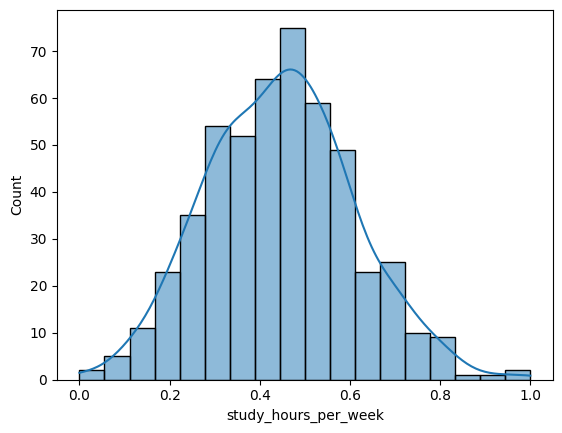

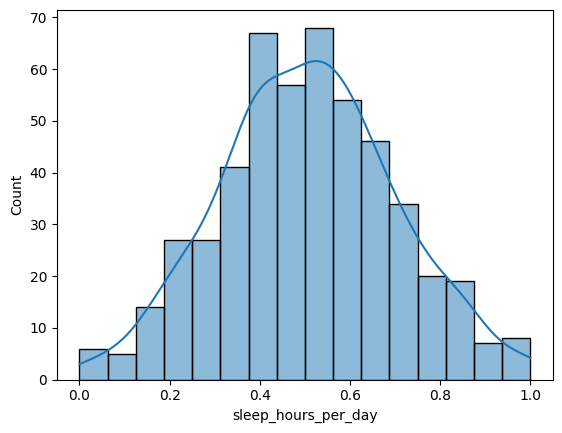

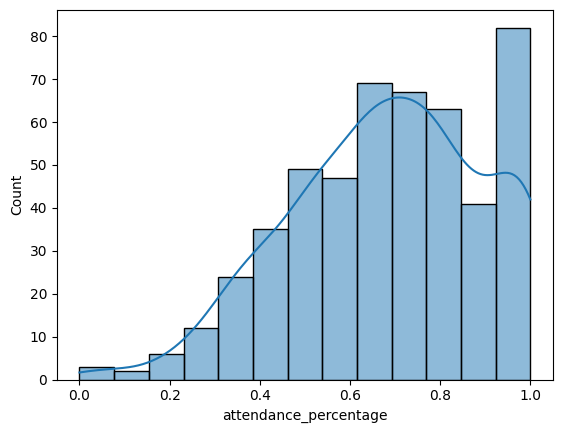

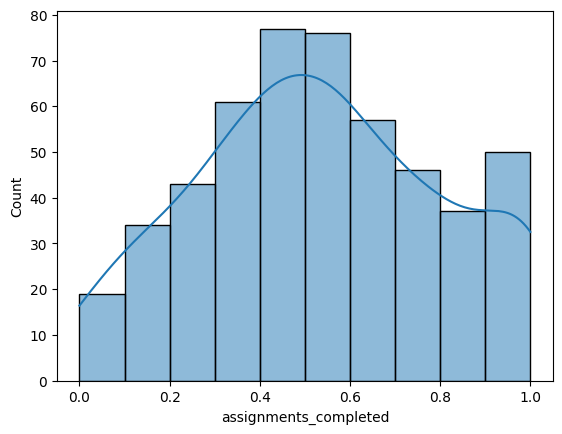

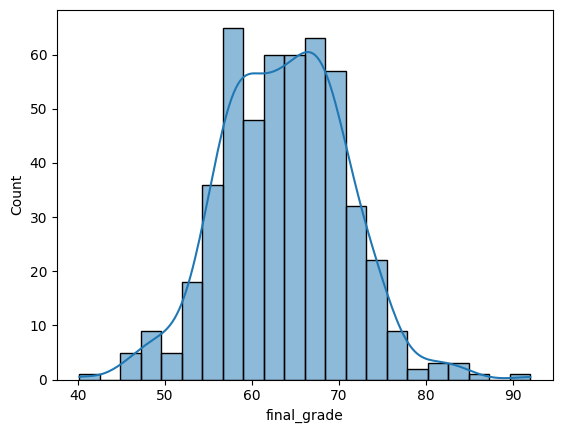

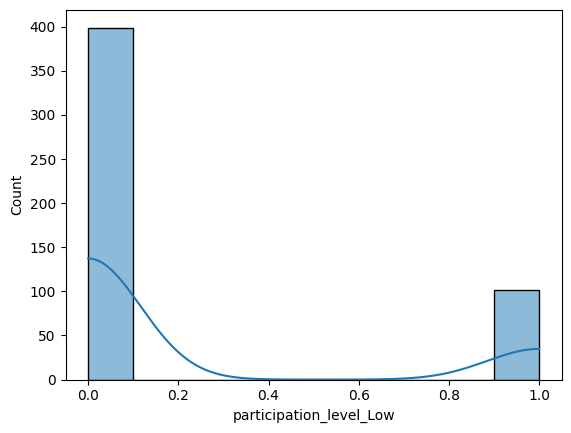

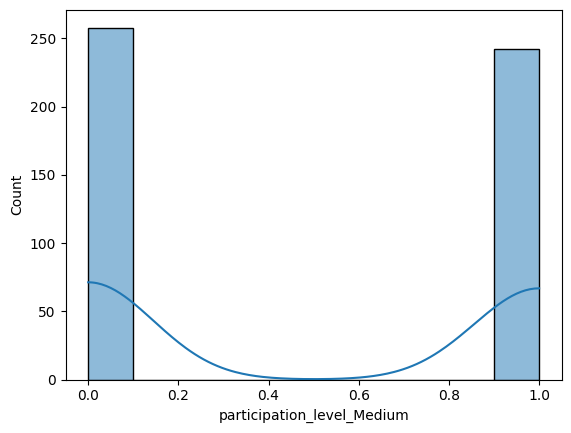

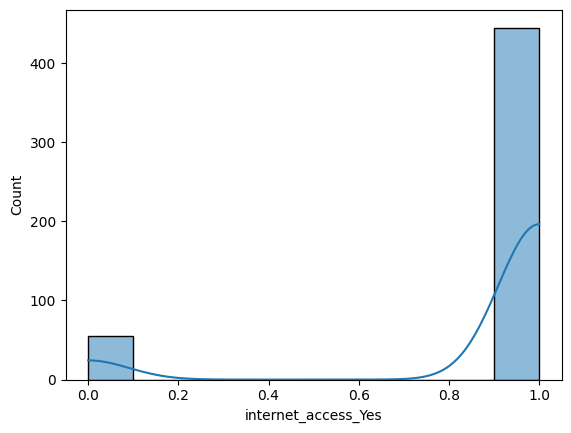

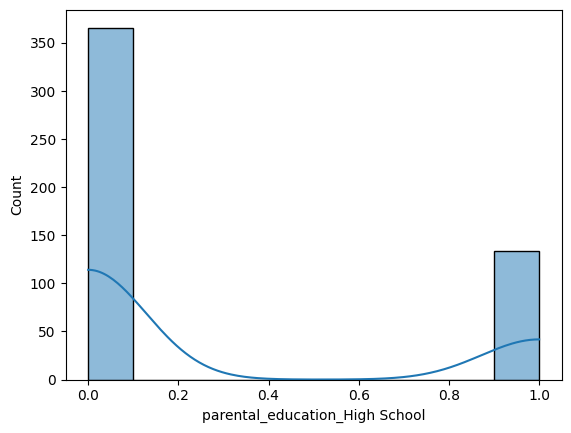

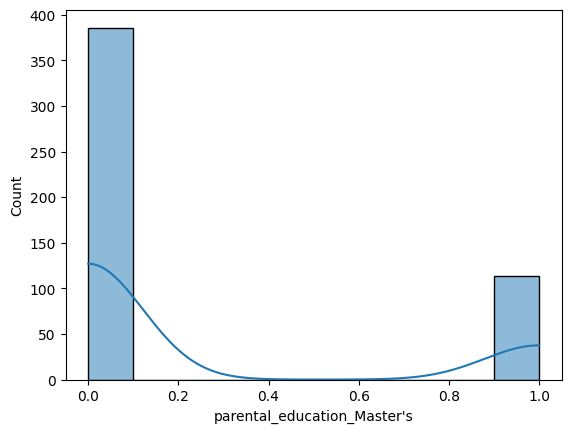

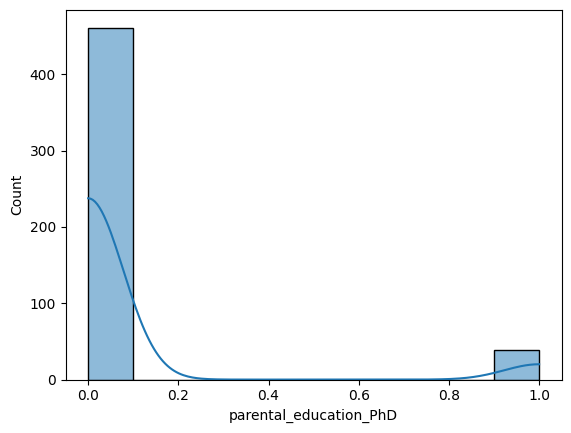

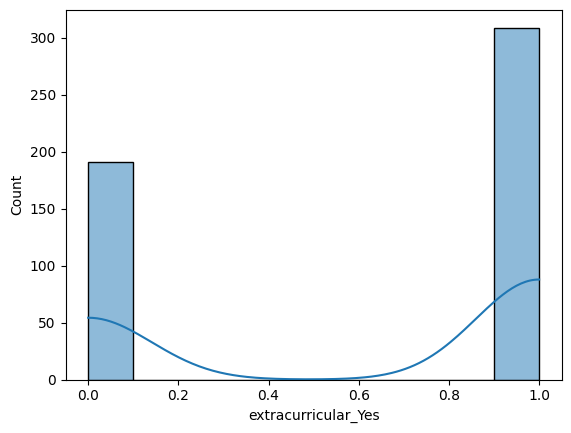

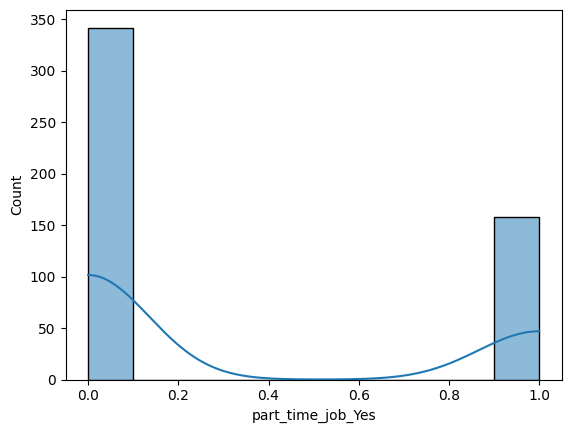

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df:
    if df[col].dtype != '0':
        sns.histplot(df[col], kde=True, stat='count')
        plt.show()

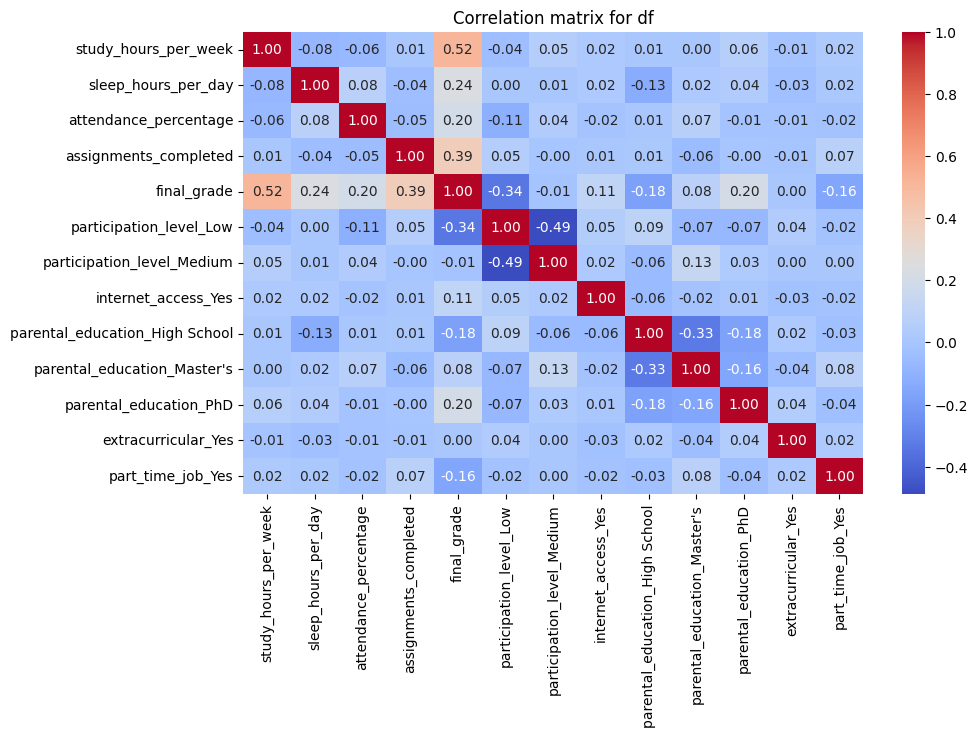

In [29]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for df")
plt.show()

In [30]:
df.drop(columns=['participation_level_Medium', 'participation_level_Low', 'parental_education_High School', 'part_time_job_Yes', 'extracurricular_Yes'])

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,internet_access_Yes,parental_education_Master's,parental_education_PhD
0,0.527230,0.685236,0.993245,0.222222,71.104897,1.0,0.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,1.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,1.0,0.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
495,0.534263,0.443780,1.000000,0.222222,67.032033,1.0,0.0,0.0
496,0.271570,0.859537,1.000000,0.333333,57.419677,1.0,0.0,0.0
497,0.412721,0.628169,0.949083,0.555556,74.950594,1.0,0.0,0.0
498,0.298508,0.385764,0.906468,0.333333,55.271003,1.0,0.0,0.0


In [31]:
df['final_grade'] = df['final_grade'].apply(lambda x: 
                                                    1 if x >= 90 else
                                                    2 if x >= 80 else
                                                    3 if x >= 70 else
                                                    4 if x >= 60 else
                                                    5)



In [32]:
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [33]:
X = df.drop('final_grade', axis=1)
y = df.drop(columns=['final_grade'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train, y_train)
print(kmeans.labels_)

acc = accuracy_score(y_test, y_pred)

[3 0 0 2 0 4 2 4 2 0 3 2 2 1 0 2 4 0 1 1 0 3 0 4 0 1 0 0 0 1 0 3 4 0 3 1 1
 2 1 2 1 3 3 3 1 0 2 0 3 4 1 1 2 2 3 3 3 4 1 1 2 1 1 2 3 3 3 2 4 2 2 0 2 0
 0 0 3 3 4 2 3 2 4 0 4 2 1 4 3 4 1 4 1 2 1 0 1 0 2 0 3 0 0 4 2 2 2 3 3 1 3
 3 3 2 1 2 2 4 2 2 1 3 0 1 3 2 4 2 3 1 2 2 3 1 2 3 0 1 0 4 0 3 4 0 2 3 2 2
 0 4 2 0 3 3 2 1 3 1 2 3 4 2 4 0 2 1 2 2 1 1 2 2 2 3 1 2 0 0 2 1 2 3 0 3 2
 2 3 1 3 2 0 3 1 0 1 0 1 1 2 3 2 0 2 2 0 2 0 3 3 3 2 3 4 3 1 1 0 4 3 3 3 0
 0 2 1 4 0 3 2 3 3 1 4 4 3 1 3 2 0 2 1 0 0 2 2 4 4 4 2 2 1 2 0 3 3 2 0 2 1
 2 1 0 1 3 2 0 3 2 3 1 1 1 4 1 1 3 2 1 4 2 2 4 4 4 0 0 2 4 2 3 1 0 1 1 1 3
 0 2 0 3 4 0 0 2 1 0 1 4 2 2 1 1 2 2 4 3 0 1 4 3 0 4 0 2 0 1 1 2 0 0 1 3 1
 2 0 2 1 3 1 1 0 1 0 0 1 1 0 0 1 0 1 4 3 3 1 2 1 3 3 1 3 3 2 1 2 3 0 0 1 3
 2 2 2 1 1 1 2 1 2 4 1 1 0 2 4 1 1 2 2 4 0 3 1 0 1 1 1 4 0 2]


TypeError: _BaseKMeans.predict() takes 2 positional arguments but 3 were given

## Linear regression.